##### Problem Statement: 
Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
#Importing reqd libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the data
df=pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


EDA

In [3]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df.duplicated().any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.set_index('Month',inplace=True)

In [7]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Visualization

<AxesSubplot:xlabel='Month'>

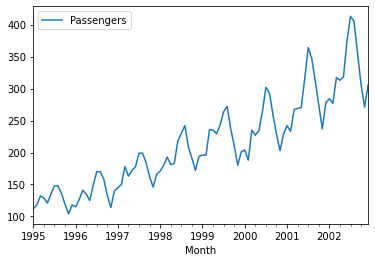

In [8]:
df.plot()

In [9]:
df1=pd.read_excel("Airlines+Data.xlsx")

In [10]:
#Get month and year columns in our data
df1["month"] = df1.Month.dt.strftime("%b") 
df1["year"] = df1.Month.dt.strftime("%Y") 
df1.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


<AxesSubplot:xlabel='month', ylabel='year'>

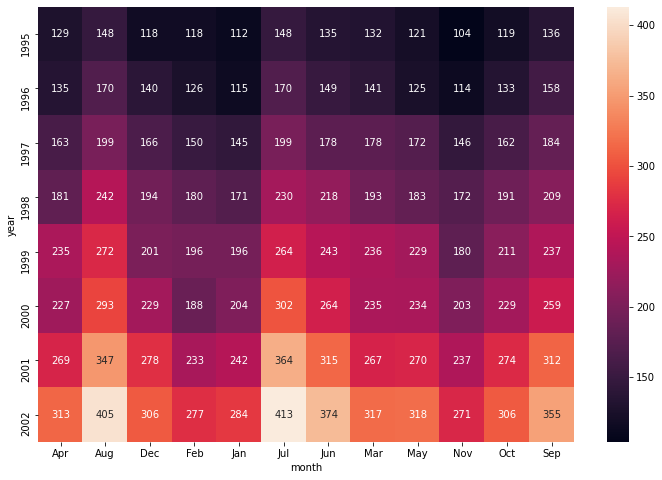

In [11]:
#Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

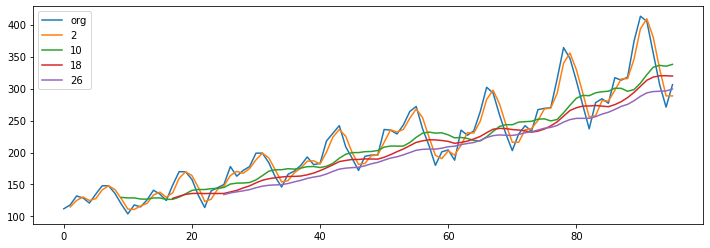

In [12]:
#Moving average
plt.figure(figsize=(12,4))
df1.Passengers.plot(label="org")
for i in range(2,30,8):
    df1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

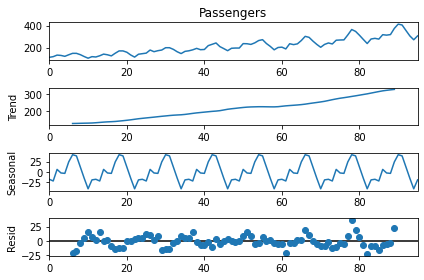

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

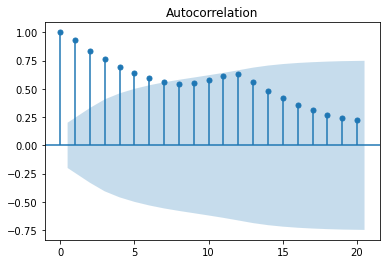

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df["Passengers"]) 

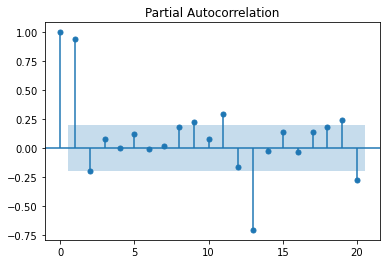

In [15]:
pacf = plot_pacf(df["Passengers"]) 

In [16]:
df1['year'] = df1['year'].astype("int64")

In [17]:
df1.columns

Index(['Month', 'Passengers', 'month', 'year'], dtype='object')

In [18]:
#Converting month column from categorical to numerical by One Hot Encoding
df2 = pd.get_dummies(df1)

In [19]:
df2

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
x=np.arange(1,97)
t=pd.Series(data=x)
t_sqr=pd.Series(data=(x*x))
df2['t'] = t
df2['t_sqr'] = t_sqr
df2['log_passengers'] = np.log(df2['Passengers'])

In [21]:
df2.sample()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t,t_sqr,log_passengers
6,1995-07-01,148,1995,0,0,0,0,0,1,0,0,0,0,0,0,7,49,4.997212


In [22]:
#Spliting the data
Train = df2.head(84)
Test = df2.tail(12)

Model Building

In [23]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)
    return np.mean(temp)

In [24]:
# Checking MAE for Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()                                                           
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                             
mae_linear = MAE(Test['Passengers'],pred_linear)     
mae_linear

0.12875898544471467

In [25]:
# Checking MAE for Exponential model

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
mae_Exp = MAE(Test['Passengers'], np.exp(pred_Exp))
mae_Exp

0.1110245939198577

In [26]:
# Checking MAE for Quadratic model

Quad = smf.ols('Passengers~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
mae_Quad = MAE(Test['Passengers'],pred_Quad)
mae_Quad

0.1183816808031584

In [27]:
# Checking MAE for Additive seasonality model

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
mae_add_sea = MAE(Test['Passengers'],pred_add_sea)
mae_add_sea

0.6601957591766385

In [28]:
# Checking MAE for Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Passengers~t+t_sqr+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_sqr']]))
mae_add_sea_quad = MAE(Test['Passengers'], pred_add_sea_quad)
mae_add_sea_quad

0.05571086177988465

In [29]:
# Checking Multiplicative Seasonality model

Mul_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
mae_Mult_sea = MAE(Test['Passengers'], np.exp(pred_Mult_sea))
mae_Mult_sea

0.7218240575033893

In [30]:
# Checking MAE for Multiplicative Additive Seasonality model

Mul_Add_sea = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
mae_Mult_add_sea = MAE(Test['Passengers'], np.exp(pred_Mult_add_sea))
mae_Mult_add_sea 

0.024187475026051095

In [31]:
# Forecasting by data driven model
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
Train = df1.head(84)
Test = df1.tail(12)

In [33]:
#Simple Exponential Method

ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_ses = MAE(pred_ses,Test.Passengers) 
MAE_ses

C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


0.1341127474051367

In [34]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test.Passengers) 
MAE_hw

<ipython-input-34-cba1fd92518f>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


0.23530719652100926

In [35]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_add_add = MAE(pred_hwe_add_add,Test.Passengers) 
MAE__hwe_add_add

0.05499258483636923

In [36]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test.Passengers)
MAE__hwe_mul_add

0.028205793420354914

### Forecasting by ARIMA Model

In [37]:
# separate out a validation dataset
split_point = len(df) - 12
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 84, Validation 12


In [38]:
# prepare data
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [39]:
train.size, test.size

(42, 42)

In [40]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
MAE_base = MAE(predictions, test)
print('MAE_base: %.3f' % MAE_base)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [41]:
#performing test to check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [42]:
adf_test(df['Passengers'])

ADF Statistics: 1.3402479596467118
p- value: 0.9968250481137263
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [43]:
## Since passangers is non stationary, generating first difference
df['Passengers First Difference']=df['Passengers']-df['Passengers'].shift(12)

In [44]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.6900043838623167
p- value: 0.07578397625851754
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
### Since first difference is non stationary, generating second difference
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(12)

In [46]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -2.109480142138181
p- value: 0.24071971540603881
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [47]:
### Since second difference is non stationary, generating third difference
df['Passengers Third Difference']=df['Passengers Second Difference']-df['Passengers Second Difference'].shift(12)

In [48]:
adf_test(df['Passengers Third Difference'].dropna())

ADF Statistics: -4.89382405549013
p- value: 3.585265761394368e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [49]:
##### Since the 3rd difference is stationary, we can build the ARIMA model on it.
from datetime import datetime,timedelta
train_dataset_end=datetime(1999,12,1)
test_dataset_end=datetime(2002,12,1)

In [50]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [51]:
## create a SARIMA model as we are working with seasonal data
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model_SARIMA=SARIMAX(train_data['Passengers'],order=(10,0,2),seasonal_order=(0,3,0,12))

C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [53]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Nithesh Shetty\Downloads\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Passengers   No. Observations:                   60
Model:             SARIMAX(10, 0, 2)x(0, 3, [], 12)   Log Likelihood                -106.783
Date:                              Tue, 28 Feb 2023   AIC                            239.565
Time:                                      11:30:28   BIC                            254.880
Sample:                                  01-01-1995   HQIC                           243.628
                                       - 12-01-1999                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5804      0.628      0.925      0.355      -0.650       1.811
ar.L2          0.4938      0.715      0.691      0.490      -0.907       1.895
ar.L3         -0.4802      0.617     -0.779      0.436      -1.689       0.729
ar.L4          0.1988      0.546      0.364      0.716      -0.872       1.269
ar.L5         -0.1637      0.484     -0.338      0.735      -1.112       0.785
ar.L6         -0.0070      0.479     -0.015      0.988      -0.946       0.932
ar.L7         -0.0397      0.585     -0.068      0.946      -1.186       1.106
ar.L8         -0.0791      0.319     -0.248      0.804      -0.704       0.545
ar.L9          0.3848      0.615      0.626      0.531      -0.820       1.590
ar.L10        -0.4764      0.439     -1.084      0.278      -1.338       0.385
ma.L1          0.1999     12.533      0.016      0.987     -24.363      24.763
ma.L2         -0.7821     10.224     -0.076      0.939     -20.820      19.256
sigma2        98.2079   1208.320      0.081      0.935   -2270.056    2466.472
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.27   Prob(JB):                         0.45
Heteroskedasticity (H):               0.92   Skew:                            -0.16
Prob(H) (two-sided):                  0.91   Kurtosis:                         1.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2000-01-01 00:00:00
2002-12-01 00:00:00


In [56]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2000,1,1),end=datetime(2002,12,1))

In [57]:
MAE_Sarima = MAE(pred_Sarima, test_data['Passengers'])

In [58]:
MAE_Sarima

0.16039230636975066

### Now comparing the MAE of all the models to choose the best one 

In [59]:
#Compare the results 

data = {"MODEL":pd.Series(["MAE_linear","MAE_Exp","MAE_Quad","MAE_add_sea","MAE_add_sea_quad","MAE_Mult_sea","MAE_Mult_add_sea","MAE_ses","MAE_hw","MAE_hwe_add_add","MAE__hwe_mul_add","MAE_base","MAE_SARIMA"]),"MAE_Values":pd.Series([mae_linear,mae_Exp,mae_Quad,mae_add_sea,mae_add_sea_quad,mae_Mult_sea,mae_Mult_add_sea,MAE_ses,MAE_hw,MAE__hwe_add_add,MAE__hwe_mul_add,MAE_base,MAE_Sarima])}
table_mae=pd.DataFrame(data)
table_mae.sort_values(['MAE_Values'])

,MODEL,MAE_Values
6,MAE_Mult_add_sea,0.024187
10,MAE__hwe_mul_add,0.028206
9,MAE_hwe_add_add,0.054993
4,MAE_add_sea_quad,0.055711
11,MAE_base,0.089354
1,MAE_Exp,0.111025
2,MAE_Quad,0.118382
0,MAE_linear,0.128759
7,MAE_ses,0.134113
12,MAE_SARIMA,0.160392


Inference is that Multiplicative additve seasonality is giving less Mean Absolute Error. Hence the same model can be finalized for Airlines data.